<a href="https://colab.research.google.com/github/arunt-sjsu/deep_learning/blob/main/Assignment4/Dataset_Exploration_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Goal of this notebook is to demonstrate creation of a dataset in numpy along with different visualizations to help understand the data**


In [45]:
%%capture
%pip install bokeh


In [25]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(10000, 3)*10, columns=list('xyz'))
weights = pd.DataFrame(np.random.randn(10000,1), columns=['weights_a'])
weights['weights_b'] = np.random.randn(10000,1)
weights['weights_c'] = np.random.randn(10000,1)

In [26]:
df["a"] = 2 * weights['weights_a'] * np.square(df['x']) + 8 * weights['weights_b'] * np.power(df['y'],3) - 3 * df['z'] 
df["b"] = 3 * weights['weights_a'] * np.square(df['x']) - 5 * weights['weights_b'] * np.square(df['y']) - 2 * weights['weights_c'] * np.power(df['z'],3) 

In [59]:
bin_labels = ['Low', 'Mid', 'High', 'Very High']
df['Level_A'] = pd.qcut(df['a'], q=4, labels=bin_labels)
df['Level_B'] = pd.qcut(df['b'], q=4, labels=bin_labels)


In [46]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()


In [63]:
# define hover tool
from bokeh.models import HoverTool
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('label','@label'),
               ('index', '$index')]
)

# create figure
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], 
                  plot_width=600)

# bokeh data source from the dataframe
source = ColumnDataSource(df)

# color definition
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper

palette = d3['Category10'][4]
cmap = CategoricalColorMapper( factors=bin_labels, palette=palette )

# scatter plot in figure
fig_scat.scatter(
    x='y', y='a', alpha=0.5, 
    color={'field': 'Level_A', 'transform': cmap}, 
    source=source
)

# display below
show(fig_scat)


In [64]:
# define hover tool
from bokeh.models import HoverTool
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('label','@label'),
               ('index', '$index')]
)

# create figure
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], 
                  plot_width=600)

# bokeh data source from the dataframe
source = ColumnDataSource(df)

# color definition
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper

palette = d3['Category10'][4]
cmap = CategoricalColorMapper( factors=bin_labels, palette=palette )

# scatter plot in figure
fig_scat.scatter(
    x='z', y='a', alpha=0.5, 
    color={'field': 'Level_B', 'transform': cmap}, 
    source=source
)

# display below
show(fig_scat)


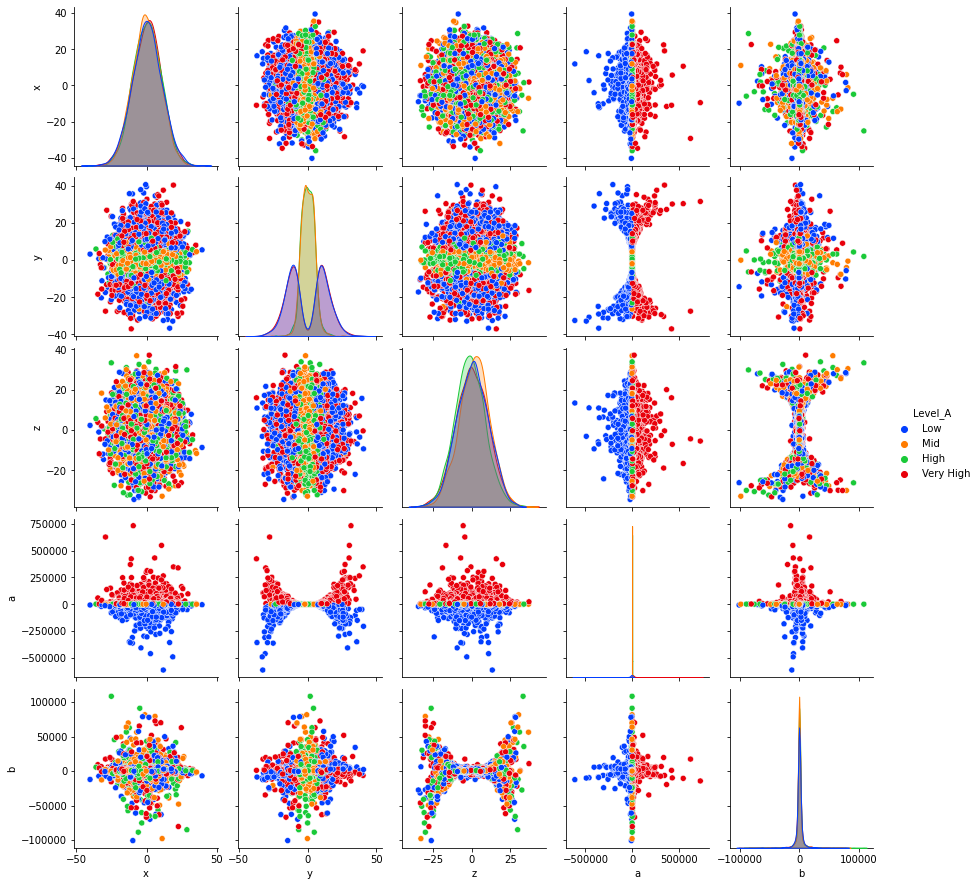

In [57]:
import seaborn as sns
sns.pairplot(df, hue="Level_A", palette='bright');


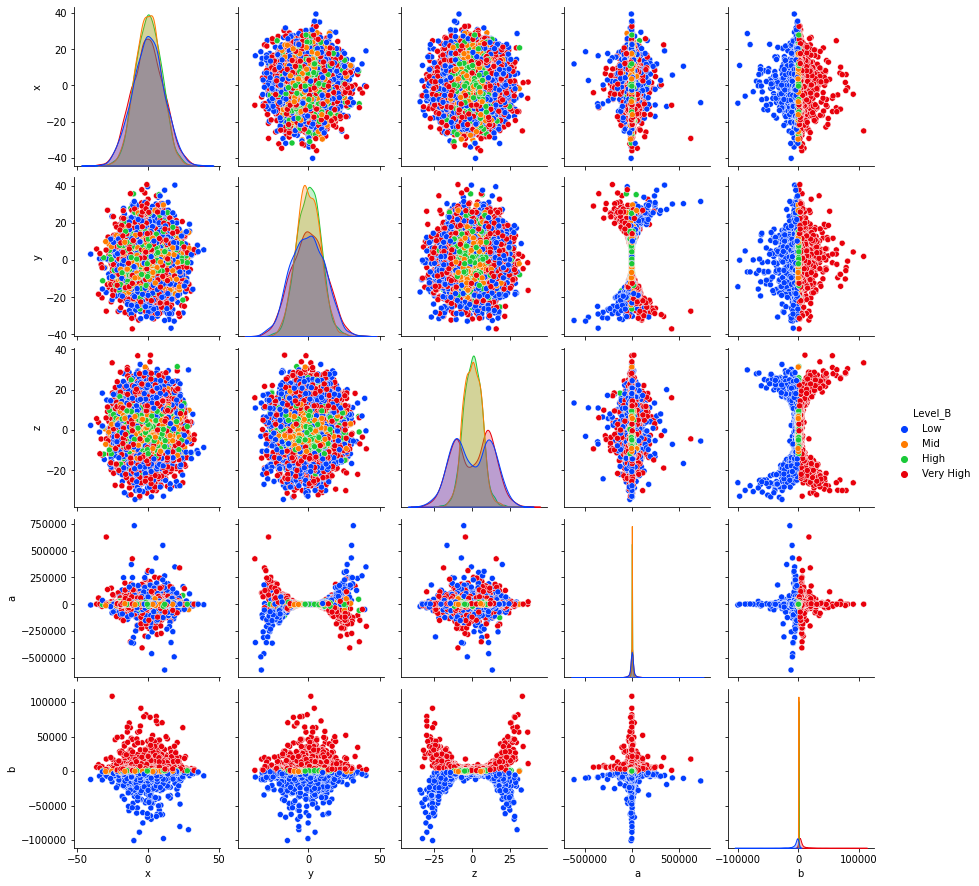

In [65]:
import seaborn as sns
sns.pairplot(df, hue="Level_B", palette='bright');
